# KIỂM TRA GIỮA KÌ : KHOA HỌC DỮ LIỆU

### Link dataset: https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset
Dữ liệu của xe motor được bán qua từng năm(1988 - 2020) của 1 khu vực


## Câu 1: Boostrap Sampling Method
Ước tính phân bố lấy mẫu của 1 thông số thông kê,
ở bài này chúng ta sẽ dùng thông số thống kê là độ lệch chuẩn (STD)

In [60]:
# Trước hết, ta import các thư viện 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

Để làm việc với file csv ta dùng các hàm của pandas

In [61]:
# Đọc dữ liệu từ dataset
data = pd.read_csv('BIKE DETAILS.csv') 


Chọn 1 thuộc tính bất kì của dataset để thống kê, ở đây mình chọn thuộc tính 
'selling_price'

In [62]:
# Trích xuất dữ liệu từ đặc trưng thành array
arrData = data['selling_price'].to_numpy()
print(arrData[:5])

[175000  45000 150000  65000  20000]


## Create Function 
### Input parameter : n(sample size), M(number of bootstrap samplings), x (confidence interval in %) 
### Output : figure of histogram, range of confidence interval



In [63]:
# 1. Tính toán đặc trưng trên M lần
# 2. Tính khoảng tin cậy
# 3. Plot
def BootstrapMethod(n, M, x):    
    arrSTD = [] 
    
    for _ in range(M): 
        rowData = arrData[np.random.randint(len(data), size= n)] 
        stdRow = np.std(rowData) 
        arrSTD.append(stdRow) 
        
    percent = ((1.0-x)/2.0) * 100
    lower =  np.percentile(arrSTD, percent)
    
    percent = (x+((1.0-x)/2.0)) * 100
    upper =  np.percentile(arrSTD, percent)

    confidenceIntervalRange = np.array([lower, upper], dtype= int)
    
    sns.displot(arrSTD, kde = True) 
    plt.plot([lower, lower],[0, 650],color= "r")
    plt.plot([upper, upper],[0, 650], color= "r")
    plt.annotate(round(lower), [lower, 180])
    plt.annotate(round(upper), [upper, 180])
    return confidenceIntervalRange 

Gọi hàm

Range of Confidence Interval : [16442 85521]


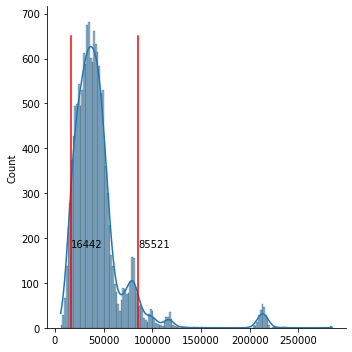

In [64]:
print("Range of Confidence Interval :", BootstrapMethod(10, 15000,0.9))

## NHẬN XÉT:
### Kết quả cho ta thấy được rằng độ lệch chuẩn về giá cả của các loại xe được tập trung khoảng 10000 đến 110000. 
### Các tham số ảnh hưởng khá nhiều đến kết quả:
- Sample size: khi càng tăng size của sample ta sẽ tính được giá trị độ lệch chuẩn càng lớn
- Number of bootstrap samplings : càng tăng thì sẽ cho ra kết quả với độ mịn cao hơn vì tần xuất lặp lại của các giá trị tăng
- CI : loại bỏ được các giá trị nằm ngoài phạm vi được xét
### Ý kiến cá nhân
- Không nên chọn size của sample quá lớn ( < 100)
- Nên sử dụng giá trị M lớn nhất có thể tuỳ thuộc vào sample size (ảnh hướng đến độ phức tạp)
- CI: nên sử dụng khoảng 90% nếu M lớn và 95% nếu M nhỏ hơn

## Câu 2: Thống kê mô tả quan trọng của các biến

In [65]:
# Đọc dữ liệu từ dataset
data = pd.read_csv('BIKE DETAILS.csv') 
print(data.head(10))

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

Nhìn vào dataset ta có thể thấy được các biến như [name, selling_price, year, seller_type, owner, km_driven, ex_showroom_price]
Giờ chúng ta sẽ tính các đặc trưng của tất cả các biến như [selling_price, year, km_driven, ex_showroom_price]

In [66]:
data.replace({'1st owner':1, '2nd owner':2, '3rd owner':3, '4th owner':4}, inplace=True)
data.drop(['name'], axis=1, inplace=True)
data.head(10)

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,175000,2019,Individual,1,350,NaN
1,45000,2017,Individual,1,5650,NaN
2,150000,2018,Individual,1,12000,148114.0
3,65000,2015,Individual,1,23000,89643.0
4,20000,2011,Individual,2,21000,NaN
5,18000,2010,Individual,1,60000,53857.0
6,78500,2018,Individual,1,17000,87719.0
7,180000,2008,Individual,2,39000,NaN
8,30000,2010,Individual,1,32000,NaN
9,50000,2016,Individual,1,42000,60122.0


In [67]:
# Tính các đặc trưng từng thuộc tính của dataset
data.describe()

,selling_price,year,owner,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,1.145146,34359.833176,8.795871e+04
std,56304.291973,4.301191,0.402407,51623.152702,7.749659e+04
min,5000.000000,1988.000000,1.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,1.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,1.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,1.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,4.000000,880000.000000,1.278000e+06


## Phân tích độ quan trọng của các biến

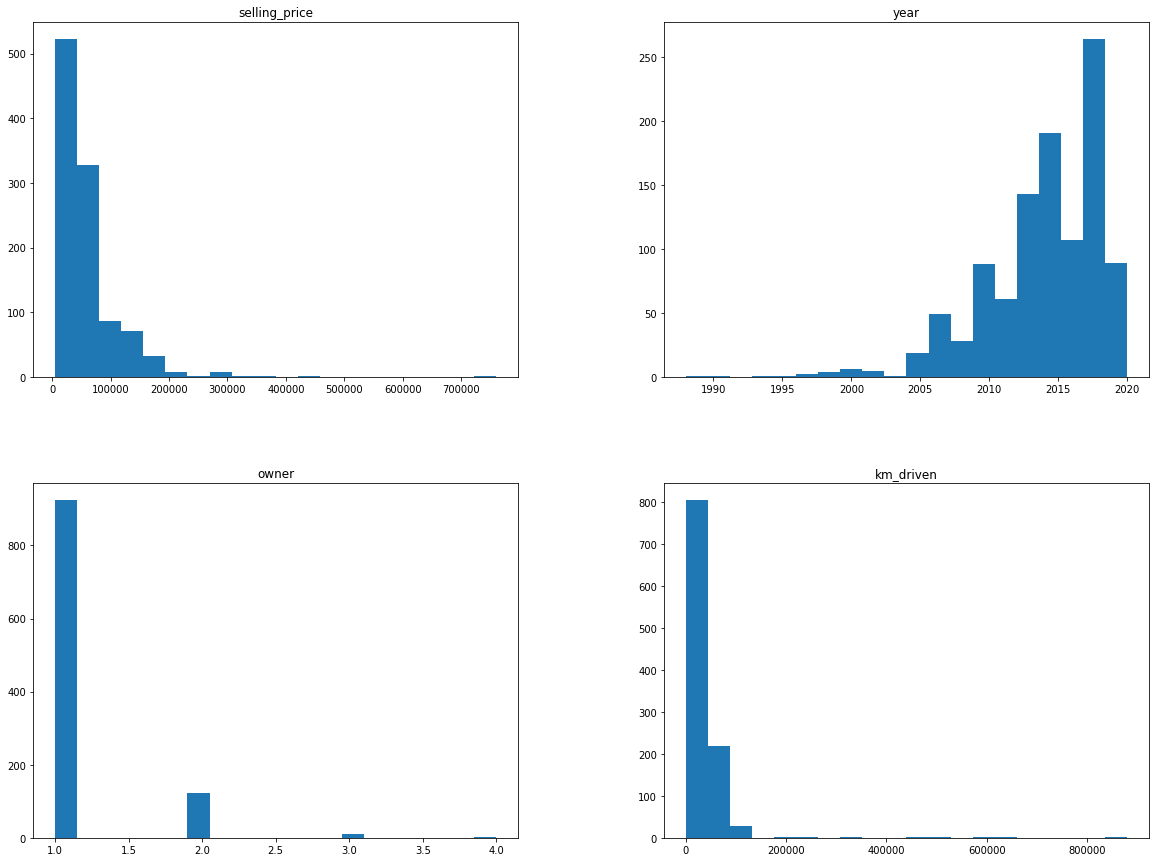

In [68]:
data.drop(['ex_showroom_price'], axis=1, inplace=True)
data.hist(figsize=(20,15), grid=0, bins=20);

### Nhận xét:
- Số lượng xe
    + chủ yếu ở mức giá 20-180k$
    + lúc mua tập trung vào khoảng năm 2005-2020
    + chủ sở hữu đa số là mua mới
    + quãng đường đã đi vào khoảng 10-150k km

## Sự tương quan

<AxesSubplot:xlabel='year', ylabel='Count'>

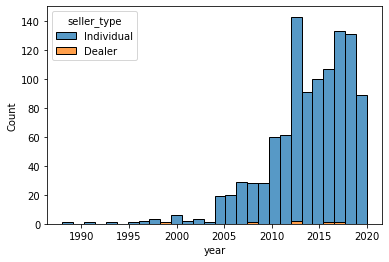

In [69]:
# Biểu đồ phân bố chuẩn của xe được bán ra và bán lại theo từng năm
sns.histplot(data=data, x="year", hue="seller_type", multiple="stack")

### Nhận xét:
- Lượng xe được bán ra tập trung nhiều vào các năm từ 2010-2020
- Khách hàng đa số là tự đi mua, ít được chào mua

<AxesSubplot:xlabel='year', ylabel='Count'>

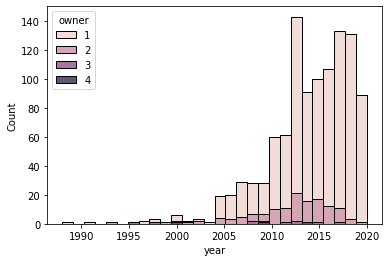

In [70]:
# Biểu đồ phân bố chuẩn của xe được bán ra và loại chủ sở hữu tương ứng theo từng năm
sns.histplot(data=data, x="year",hue="owner", multiple="stack")

### Nhận xét:
- Đa số khách mua xe đều là chủ đầu
- từ 2010 đến 2017 có dấu hiệu pass lại xe nhiều tuy nhiên giảm ngay sau đó

<AxesSubplot:xlabel='year', ylabel='selling_price'>

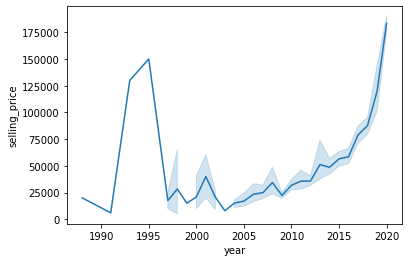

In [71]:
# biểu đồ thể hiện giá bán của các xe dao động theo từng năm
sns.lineplot(x = "year", y = "selling_price", data = data)

### Nhận xét:
- Giá xe được tăng từ 250k và không có xu hướng giảm
- Lý do : Thoái hoá dòng tiền, Siêu xe ra đời
- Những năm 1990-1995 xe cũng được đẩy giá lên cao.
- Lý do : đam mê các loại xe cổ, đấu giá,...
- Quy luật : Bắt đầu từ 2005 các loại xe bắt đầu tăng giá

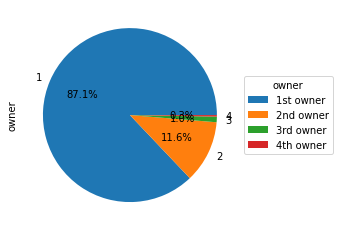

In [72]:
# Phân chia các lại chủ sở hữu
labels = ['1st owner', '2nd owner', '3rd owner', '4th owner']
data['owner'].value_counts().plot.pie(autopct='%.1f%%')
x = data['owner'].value_counts()
plt.legend(labels,
          title="owner",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


### Nhận xét:
- chủ sở hữu đa số là chủ đầu
- các chủ sở hữu sau tập trung chủ yếu vào các năm từ 2010-2017